# The Battle of Neighborhoods

First import the necesary libraries

In [182]:
import pandas as pd
import numpy as np
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library

from bs4 import BeautifulSoup as bs




Mount google drive in colab 

In [4]:
# Cargar google drive en google Colab
from google.colab import drive

# Montar carpeta de google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Get the dataset of worldcities 

In [5]:
data_world = pd.read_csv('/content/drive/My Drive/Coursera Capstone/worldcities.csv')

In [6]:
data_ec = data_world[data_world['country']=='Ecuador']
data_ec = data_ec[['city','lat','lng','admin_name','population']]
data_ec = data_ec.reset_index(drop=True)


data_ec.head()


,city,lat,lng,admin_name,population
0,Guayaquil,-2.1833,-79.8833,Guayas,2723665.0
1,Quito,-0.2186,-78.5097,Pichincha,2011388.0
2,Cuenca,-2.8974,-79.0045,Azuay,329928.0
3,Santo Domingo de los Colorados,-0.2542,-79.1719,Santo Domingo de los Tsáchilas,270875.0
4,Machala,-3.2667,-79.9667,El Oro,231260.0


Starting from the worldcities database, we extract information related to the country Ecuador and the city Cuenca. For that, firts we define the credentials to access foursquare.

In [7]:
CLIENT_ID = 'E1YG3M5G2TX0ONYDZ3VBNRUMPGI20CKUTMC3QZOSPLXTULSV' # your Foursquare ID
CLIENT_SECRET = 'IHWKU3NRKWCQE2O0H5D5MJQ3PXUCAGPZHMBBMSMPTMYFGVVZ' # your Foursquare Secret
ACCESS_TOKEN = 'RFHNT0PBSHKWPS1UJCKUFFCWMMPNHKOGOHPNR1TKURPX3H4H' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: E1YG3M5G2TX0ONYDZ3VBNRUMPGI20CKUTMC3QZOSPLXTULSV
CLIENT_SECRET:IHWKU3NRKWCQE2O0H5D5MJQ3PXUCAGPZHMBBMSMPTMYFGVVZ


The define a function to extract the information automatically

In [13]:
def get_nearby_bussiness(names, latitudes, longitudes, radius): 
    bussiness_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nerby bussiness
        bussiness_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for bussiness_list in bussiness_list for item in bussiness_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Bussiness', 
                  'Bussiness Latitude', 
                  'Bussiness Longitude', 
                  'Bussiness Category']
    
    print('Done')
    return(nearby_venues)

Extract the information of the downtown bussiness. The downtown of Cuenca is defined aproximately in 500 meters around the central park. The latitud and logitud of the dataset of worldcities is from the central park of Cuenca. Therefore, we extract the information around 500 meters to this point. 

In [14]:
ec_data = get_nearby_bussiness(names=data_ec['city'],
                                 latitudes=data_ec['lat'],
                                 longitudes=data_ec['lng'],
                                 radius= 500)

Done


Check the new dataset, we can notice that there is other cities of Ecuador like Guayaquil, so, now we need to select only the information related to Cuenca.

In [15]:
ec_data.head()

,City,City Latitude,City Longitude,Bussiness,Bussiness Latitude,Bussiness Longitude,Bussiness Category
0,Guayaquil,-2.1833,-79.8833,Marce's key shop,-2.184976,-79.883522,Locksmith
1,Guayaquil,-2.1833,-79.8833,Distribuidoras farmacéuticas,-2.186434,-79.883747,Pharmacy
2,Guayaquil,-2.1833,-79.8833,Picantería Valdano,-2.187464,-79.883214,Seafood Restaurant
3,Guayaquil,-2.1833,-79.8833,Cerro del Carmen,-2.182056,-79.883613,Monument / Landmark
4,Guayaquil,-2.1833,-79.8833,Mercado Artesanal,-2.184704,-79.880182,Arts & Crafts Store


In [21]:
data_cue = ec_data[ec_data['City']=='Cuenca']
data_cue

,City,City Latitude,City Longitude,Bussiness,Bussiness Latitude,Bussiness Longitude,Bussiness Category
52,Cuenca,-2.8974,-79.0045,Parque Calderón,-2.897566,-79.004757,Park
53,Cuenca,-2.8974,-79.0045,Hotel Santa Lucia,-2.897900,-79.002874,Hotel
54,Cuenca,-2.8974,-79.0045,Sucré Salé Café,-2.897371,-79.004212,Café
55,Cuenca,-2.8974,-79.0045,Trattoria Novecento,-2.897890,-79.002783,Italian Restaurant
56,Cuenca,-2.8974,-79.0045,Bauhouse Hostel & Bar,-2.895530,-79.004594,Bar
57,Cuenca,-2.8974,-79.0045,Centro Historico,-2.896612,-79.007953,Historic Site
58,Cuenca,-2.8974,-79.0045,Sabaneta,-2.898535,-79.003311,Gastropub
59,Cuenca,-2.8974,-79.0045,Tiestos Cafe Restaurante,-2.900058,-79.003521,Steakhouse
60,Cuenca,-2.8974,-79.0045,Mediterraneo,-2.901106,-79.004264,Italian Restaurant
61,Cuenca,-2.8974,-79.0045,A Pedir De Boca,-2.900564,-79.005420,Restaurant


Now, we need to get only the data related to food bussiness. In this context, due to the idea is to open a new bar-restaurant the selection criteria to segment the data are Bussiness Category in Steackhouse, Restaurtan and Bar. 

In [59]:
data_cue_bs=data_cue['Bussiness Category'].str.contains('Steakhouse')+data_cue['Bussiness Category'].str.contains('Restaurant')+data_cue['Bussiness Category'].str.contains('Bar')
data_cue_bs = data_cue[data_cue_bs]

data_cue_bs.reset_index(drop=True,inplace=True)

data_cue_bs['cluster']=[0,1,0,0,0,1,0,0,0,0,1,0,1,0,0]

data_cue_bs

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City,City Latitude,City Longitude,Bussiness,Bussiness Latitude,Bussiness Longitude,Bussiness Category,cluster
0,Cuenca,-2.8974,-79.0045,Trattoria Novecento,-2.897890,-79.002783,Italian Restaurant,0
1,Cuenca,-2.8974,-79.0045,Bauhouse Hostel & Bar,-2.895530,-79.004594,Bar,1
2,Cuenca,-2.8974,-79.0045,Tiestos Cafe Restaurante,-2.900058,-79.003521,Steakhouse,0
3,Cuenca,-2.8974,-79.0045,Mediterraneo,-2.901106,-79.004264,Italian Restaurant,0
4,Cuenca,-2.8974,-79.0045,A Pedir De Boca,-2.900564,-79.005420,Restaurant,0
5,Cuenca,-2.8974,-79.0045,Jazz Society Café,-2.900053,-79.004552,Bar,1
6,Cuenca,-2.8974,-79.0045,Café Austria,-2.897694,-79.001984,Austrian Restaurant,0
7,Cuenca,-2.8974,-79.0045,Simon 7-84,-2.896955,-79.003779,Theme Restaurant,0
8,Cuenca,-2.8974,-79.0045,El Mercado Cuenca,-2.901356,-79.005226,Comfort Food Restaurant,0
9,Cuenca,-2.8974,-79.0045,Guajibamba,-2.893709,-79.003156,Latin American Restaurant,0


Notice that in colum Bussiness Category only exist bussiness related to the selection criteria. We can see how is the distribution of food bussiness, related to the type of Bussiness.

pd. It can be notice that there is only 14 observationts that not represent the reality, but for educational purposes this fact will not be considered.

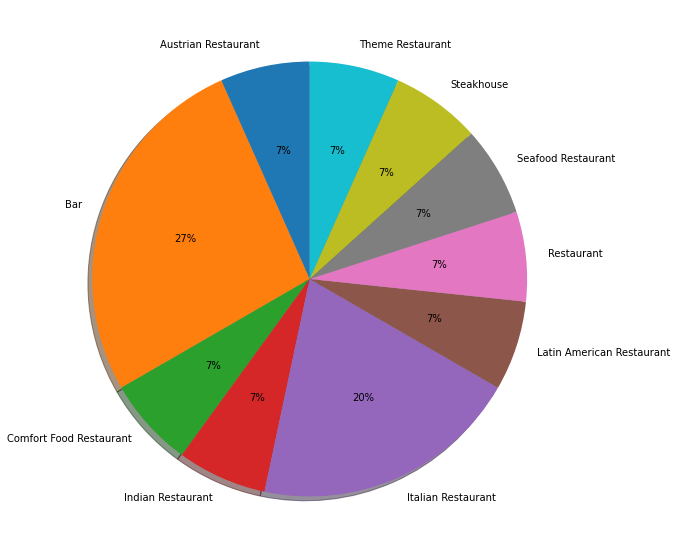

In [191]:
d= data_cue_bs.groupby(['Bussiness Category']).count()['City']

plt.figure(figsize=[10,10])
plt.pie(d,labels= d.index,autopct='%1.0f%%',shadow=True, startangle=90)
plt.show()

Now, we are going to plot the location of the down town bussiness in a map. take into account that the purple dots are refered to bars, the red ones to restaurants and the blue dot in the center shows the central park.


In [158]:
# create map
map_clusters = folium.Map(location=[-2.8974, -79.0045], zoom_start=17,tiles='Stamen Terrain',)

kclusters = 2
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(data_cue_bs['Bussiness Latitude'], data_cue_bs['Bussiness Longitude'], data_cue_bs['City'], data_cue_bs['cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=12,
        popup=label,
        color= rainbow[cluster-1],
        fill=True,
        fill_color= rainbow[cluster-1],
        fill_opacity=0.2).add_to(map_clusters)
        
# Add central park mark

folium.CircleMarker(
        [-2.8974, -79.0045],
        radius=12,
        color= 'blue',
        fill=True,
        fill_color= 'blue',
        fill_opacity=0.2).add_to(map_clusters)

map_clusters

It can be noticed that food business are grouped in the south of downtown and also, in the west there are none food business ( even 100 meters near to the central park). 
In order to better observe this fact, below, we are going to graph areas in red where the businesses are located and in green where there are no businesses.

In [159]:
folium.Polygon(
    locations=list(([-2.901722,	-79.005304],[-2.897845,	-79.008844],[-2.900058,	-79.003521])),
    popup="Path",
    tooltip = "Path",
    color="light red",
    fill_color="red"
).add_to(map_clusters)


folium.Polygon(
    locations=list(([-2.893709,	-79.003156],[-2.895530, -79.004594	],[-2.8974, -79.0045],[-2.897890,-79.002783],[-2.897694,	-79.001984])),
    popup="Path",
    tooltip = "Path",
    color="light ed",
    fill_color="red"
).add_to(map_clusters)



folium.Polygon(
    locations=list(([-2.895530,-79.004594],[-2.897845,-79.008844],[-2.8974, -79.0045])),
    popup="Path",
    tooltip = "Path",
    color="light green",
    fill_color="green"
).add_to(map_clusters)

folium.Polygon(
    locations=list(([-2.897845,-79.008844],[-2.8974, -79.0045],[-2.897890,-79.002783],[-2.900058,	-79.003521])),
    popup="Path",
    tooltip = "Path",
    color="light green",
    fill_color="green"
).add_to(map_clusters)


map_clusters